# Data Import

In [1]:
from sklearn.datasets import load_breast_cancer

# Library & Functions Import

In [2]:
# Pre-processing
from feature_engine.selection import MRMR
#Data Balancing
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score, f1_score, roc_curve, auc, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [3]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Pre-processing

In [4]:
sel = MRMR(method="FCQ", regression=False)
sel.fit(X, y)

,variables,None
,method,'FCQ'
,max_features,None
,discrete_features,'auto'
,n_neighbors,3
,scoring,'roc_auc'
,cv,3
,param_grid,None
,regression,False
,confirm_variables,False
,random_state,None


In [5]:
sel.relevance_
sel.features_to_drop_

['mean radius',
 'mean texture',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst symmetry',
 'worst fractal dimension']

In [6]:
Xtr = sel.transform(X)
print(Xtr.head())

   mean perimeter  mean concave points  worst radius  worst perimeter  \
0          122.80              0.14710         25.38           184.60   
1          132.90              0.07017         24.99           158.80   
2          130.00              0.12790         23.57           152.50   
3           77.58              0.10520         14.91            98.87   
4          135.10              0.10430         22.54           152.20   

   worst area  worst concave points  
0      2019.0                0.2654  
1      1956.0                0.1860  
2      1709.0                0.2430  
3       567.7                0.2575  
4      1575.0                0.1625  


# Data Balancing

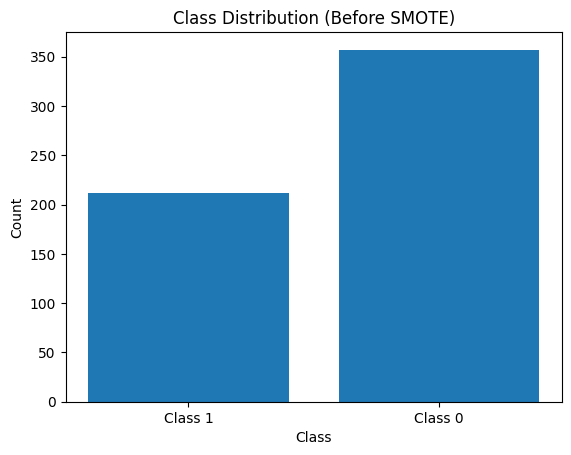

In [7]:
count_class = y.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (Before SMOTE)')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

**SMOTE**

In [8]:
smote = SMOTE(sampling_strategy=0.75)
X_res, y_res = smote.fit_resample(X, y)
print("After SMOTE:\n", y_res.value_counts())

After SMOTE:
 target
1    357
0    267
Name: count, dtype: int64


**UnderSampling**

In [9]:
undersample = RandomUnderSampler(sampling_strategy=1)
X_fin, y_fin = undersample.fit_resample(X_res, y_res)

**Balanced Data**

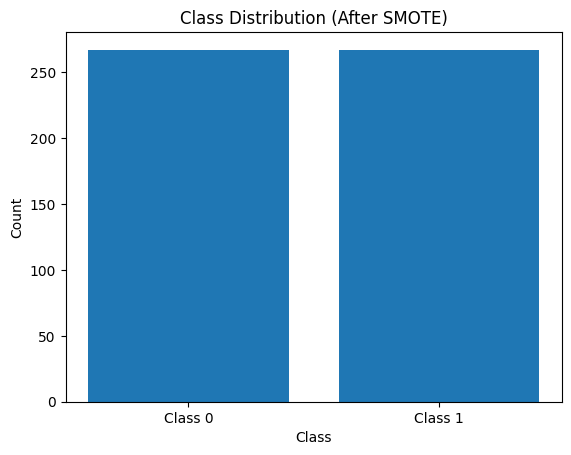

In [10]:
count_class = y_fin.value_counts()
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution (After SMOTE)')
plt.xticks(count_class.index, ['Class 0', 'Class 1'])
plt.show()

In [19]:
X=X_fin
y=y_fin

# Machine Learning Models

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Random Forest**

In [21]:
clf_rf = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_split=5,random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [22]:
cv=10
scores_rf = cross_val_score(clf_rf, X, y, cv=cv)
av_score_rf= sum(scores_rf)/cv
print(av_score_rf)

0.9607267645003494


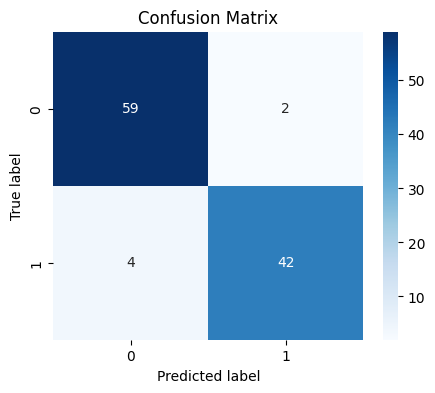

In [23]:
cm=confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Accuracy score RF
accuracy_rf=accuracy_score(y_test, y_pred_rf)
print("Accuracy score for RF:",accuracy_rf)

# Precision score RF
precision_rf=precision_score(y_test, y_pred_rf, average=None)
print("Precision score for RF:",precision_rf)

# Recall score RF
recall_rf=recall_score(y_test, y_pred_rf, average=None)
print("Recall score for RF:",recall_rf)

# F1 score RF
f1_rf = f1_score(y_test, y_pred_rf, average=None)
print("F1 score for RF:",f1_rf)

# auc RF
y_scores_rf = clf_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
auc_rf = auc(fpr, tpr)
print("AUC for RF:",auc_rf)

Accuracy score for RF: 0.9439252336448598
Precision score for RF: [0.93650794 0.95454545]
Recall score for RF: [0.96721311 0.91304348]
F1 score for RF: [0.9516129  0.93333333]
AUC for RF: 0.9882394868139701


**SMO**

In [29]:
clf_svm=svm.SVC(kernel='linear', C=10, gamma='scale',random_state=42)
clf_svm.fit(X_train, y_train)
y_scores_svm = clf_svm.decision_function(X_test)
y_pred_svm = (y_scores_svm > 0).astype(int)

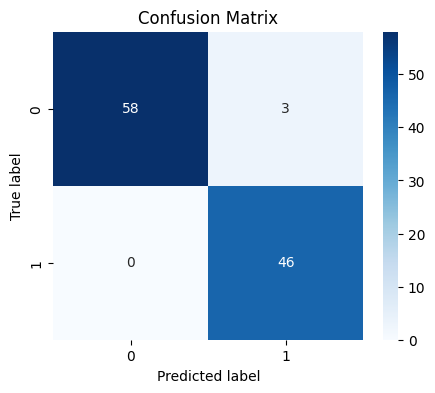

In [30]:
cm=confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Accuracy score RF
accuracy_svm=accuracy_score(y_test, y_pred_svm)
print("Accuracy score for RF:",accuracy_svm)

# Precision score RF
precision_svm=precision_score(y_test, y_pred_svm, average=None)
print("Precision score for RF:",precision_svm)

# Recall score RF
recall_svm=recall_score(y_test, y_pred_svm, average=None)
print("Recall score for RF:",recall_svm)

# F1 score RF
f1_svm = f1_score(y_test, y_pred_svm, average=None)
print("F1 score for RF:",f1_svm)

# auc RF
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)
auc_svm = auc(fpr, tpr)
print("AUC for RF:",auc_svm)

Accuracy score for RF: 0.9719626168224299
Precision score for RF: [1.         0.93877551]
Recall score for RF: [0.95081967 1.        ]
F1 score for RF: [0.97478992 0.96842105]
AUC for RF: 0.9975053456878118
